In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# Replace 'your_dataset.csv' with the actual dataset file path or URL
df = pd.read_csv('F:\Almabetter mod4\Sample - Superstore.csv')
print(df)
print(df.columns)


      Row ID        Order ID  Order Date   Ship Date       Ship Mode   
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class  \
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City   
0       CG-12520       Claire Gute   Consumer  United 

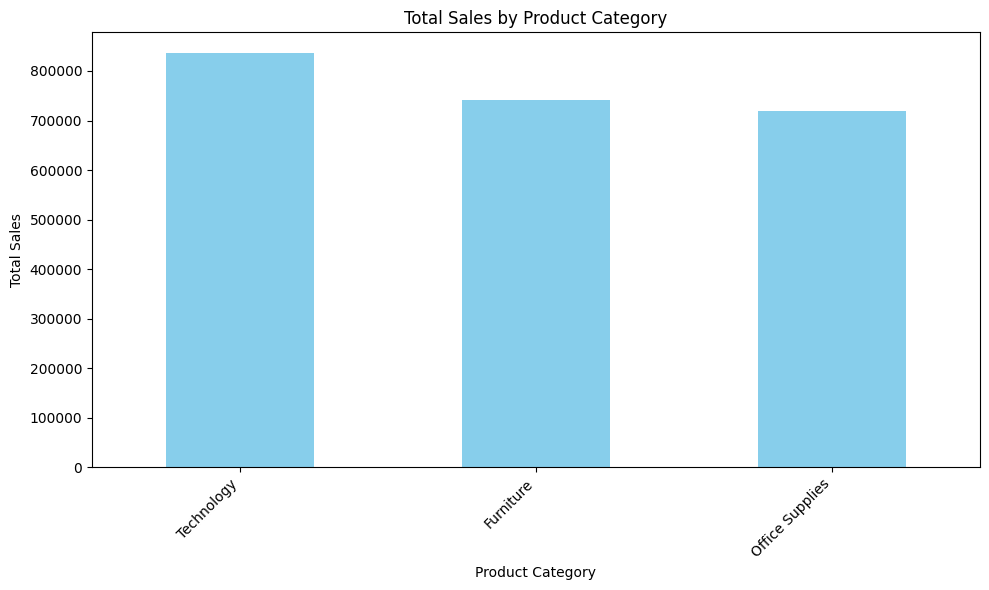

In [11]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the chart
plt.show()


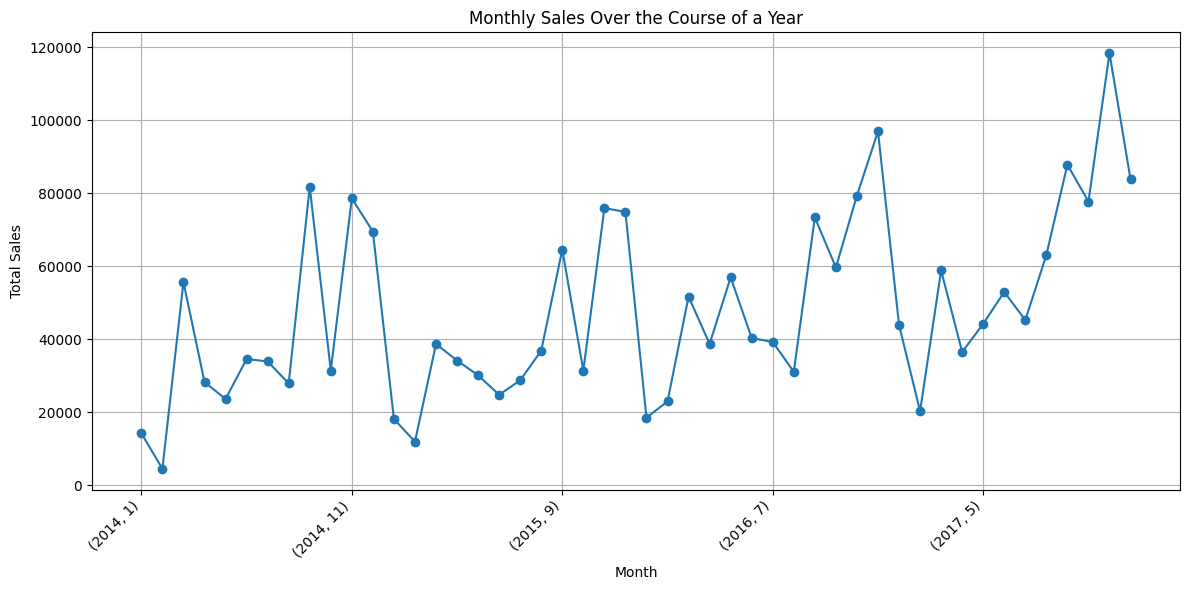

In [13]:
# Convert 'OrderDate' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract month and year from 'OrderDate'
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

# Group by month and sum the sales
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum()

# Create a line plot
plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o', linestyle='-')
plt.title('Monthly Sales Over the Course of a Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

# Show the chart
plt.show()

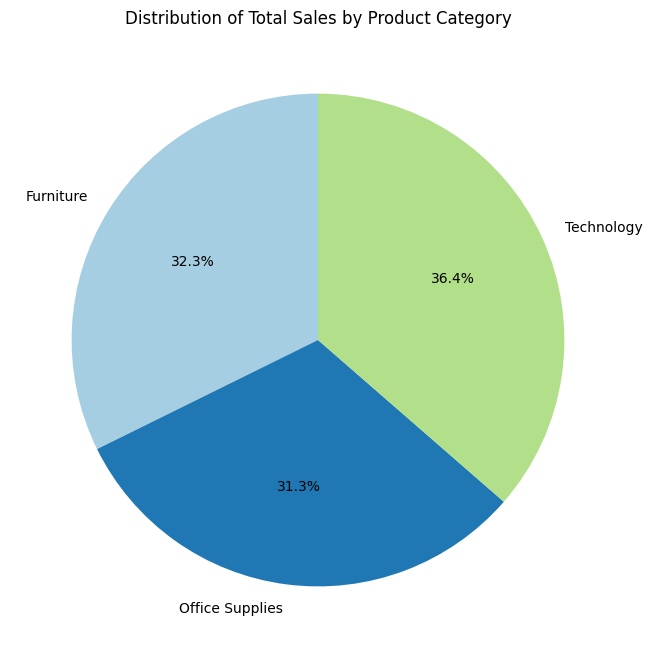

In [14]:
category_sales = df.groupby('Category')['Sales'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Total Sales by Product Category')

# Show the chart
plt.show()

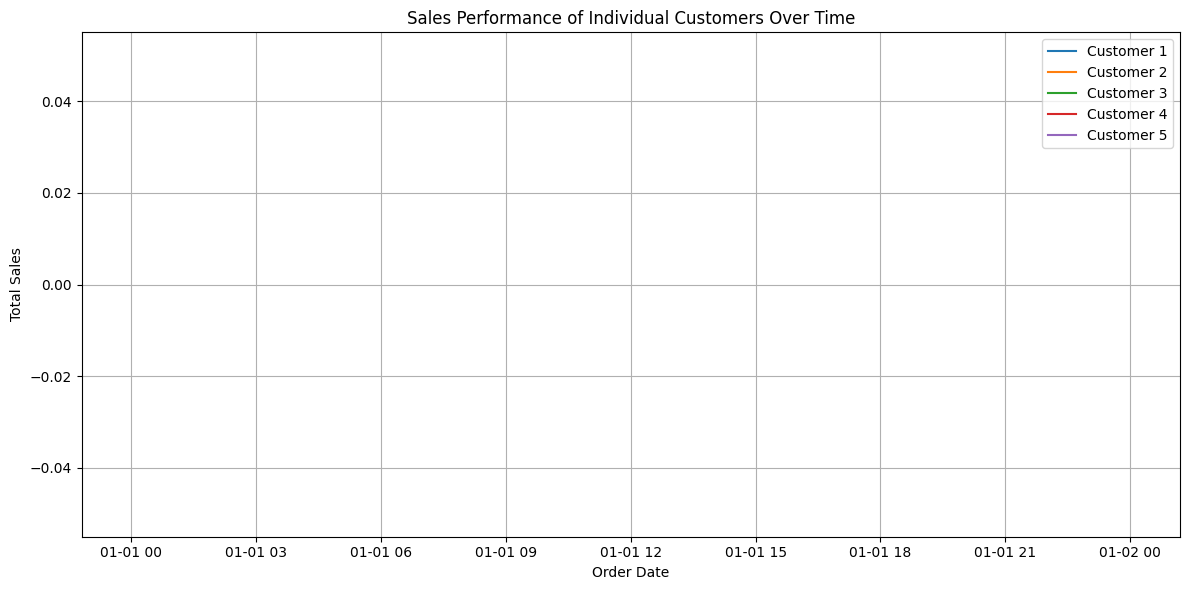

In [15]:
# Convert 'OrderDate' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by customer and sum the sales
customer_sales = df.groupby(['Customer ID', 'Order Date'])['Sales'].sum().reset_index()

# Plot sales performance for a few individual customers (you can customize this list)
selected_customers = [1, 2, 3, 4, 5]

plt.figure(figsize=(12, 6))

for customer_id in selected_customers:
    customer_data = customer_sales[customer_sales['Customer ID'] == customer_id]
    plt.plot(customer_data['Order Date'], customer_data['Sales'], label=f'Customer {customer_id}')

plt.title('Sales Performance of Individual Customers Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the chart
plt.show()

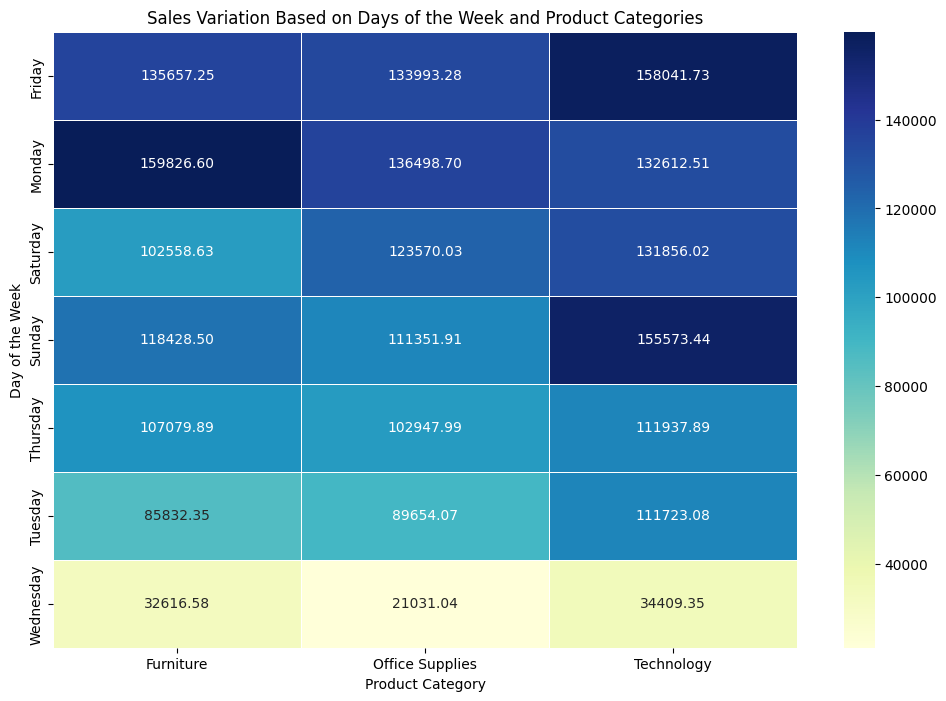

In [16]:


# Convert 'OrderDate' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract day of the week and product category
df['DayOfWeek'] = df['Order Date'].dt.day_name()
df['ProductCategory'] = df['Category']

# Group by day of the week and product category and sum the sales
sales_by_day_category = df.groupby(['DayOfWeek', 'ProductCategory'])['Sales'].sum().unstack()

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sales_by_day_category, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5)
plt.title('Sales Variation Based on Days of the Week and Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Day of the Week')

# Show the chart
plt.show()

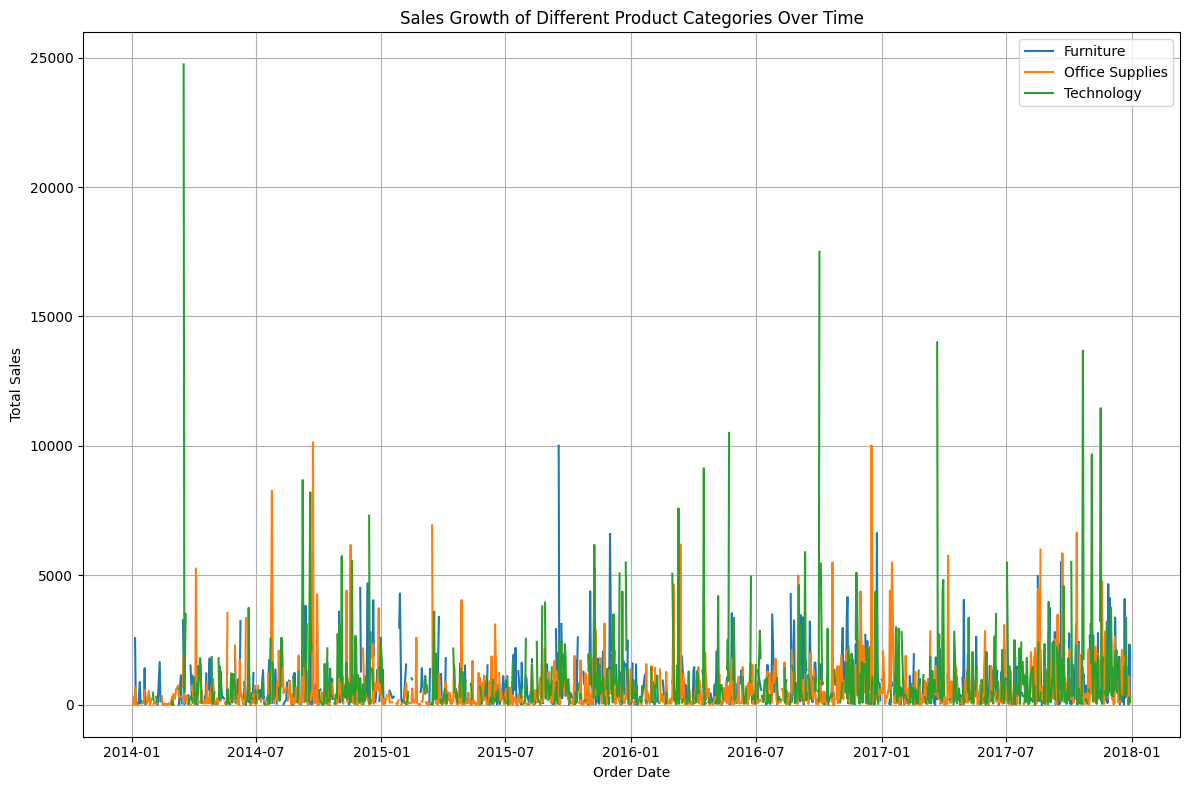

In [17]:
# Convert 'OrderDate' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract product categories and sum the sales for each category on each date
category_sales_over_time = df.groupby(['Order Date', 'Category'])['Sales'].sum().unstack()

# Plot a line chart for each product category
plt.figure(figsize=(12, 8))
for category in category_sales_over_time.columns:
    plt.plot(category_sales_over_time.index, category_sales_over_time[category], label=category)

plt.title('Sales Growth of Different Product Categories Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the chart
plt.show()

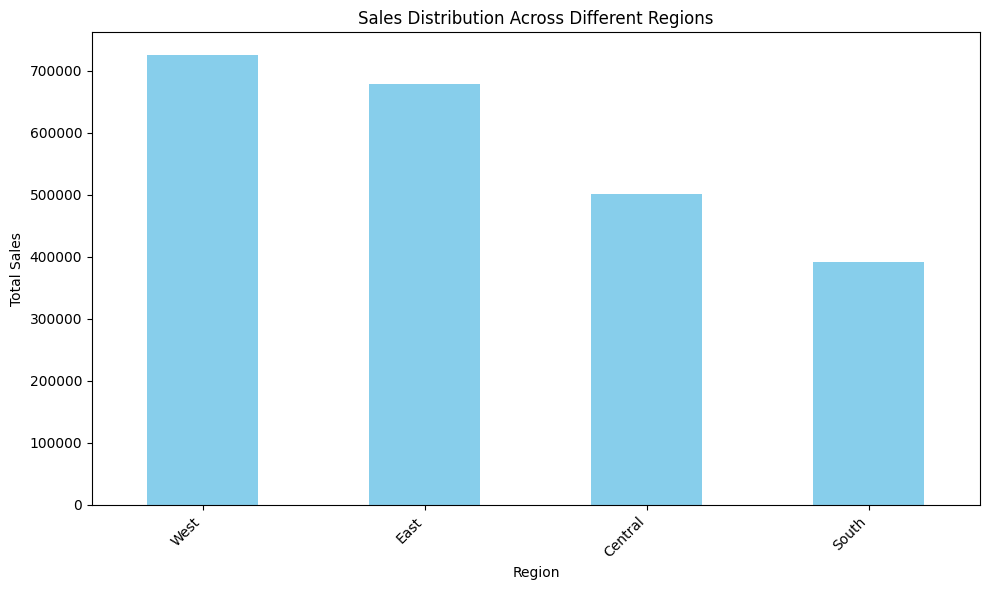

In [22]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color='skyblue')
plt.title('Sales Distribution Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the chart
plt.show()

<Figure size 1200x800 with 0 Axes>

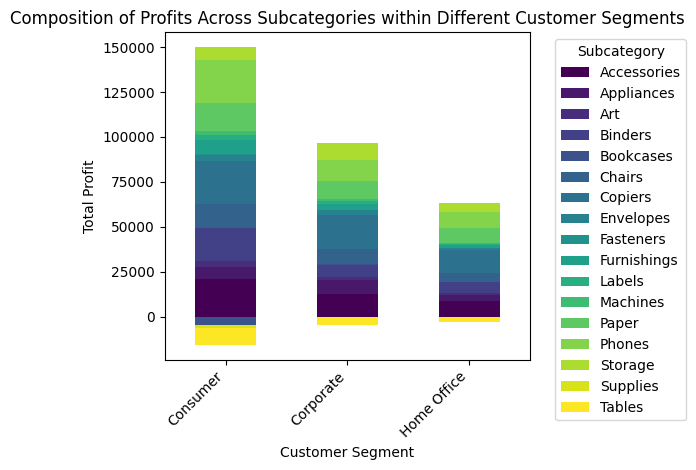

In [20]:
# Group by customer segment and subcategory, sum the profits
profits_by_segment_subcategory = df.groupby(['Segment', 'Sub-Category'])['Profit'].sum().unstack()

# Plot a stacked bar chart
plt.figure(figsize=(12, 8))
profits_by_segment_subcategory.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Composition of Profits Across Subcategories within Different Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Total Profit')
plt.legend(title='Subcategory', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the chart
plt.show()

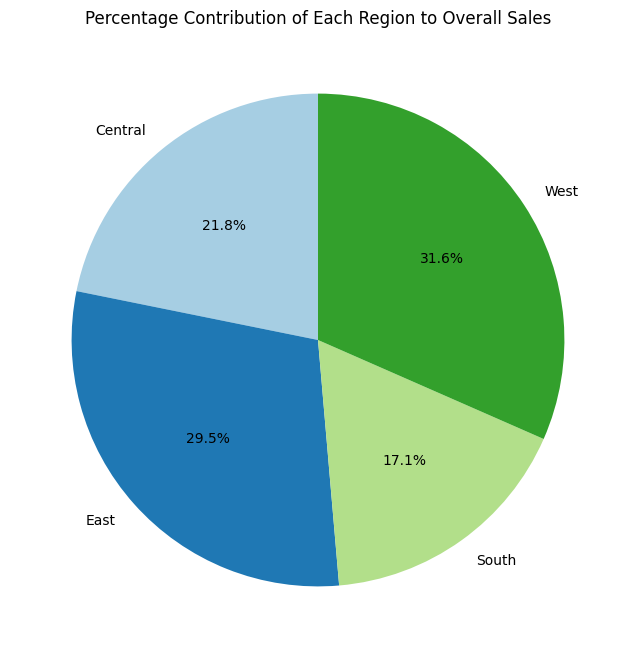

In [21]:
region_sales_percentage = (df.groupby('Region')['Sales'].sum() / df['Sales'].sum()) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_sales_percentage, labels=region_sales_percentage.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Percentage Contribution of Each Region to Overall Sales')

# Show the chart
plt.show()

<Figure size 1200x800 with 0 Axes>

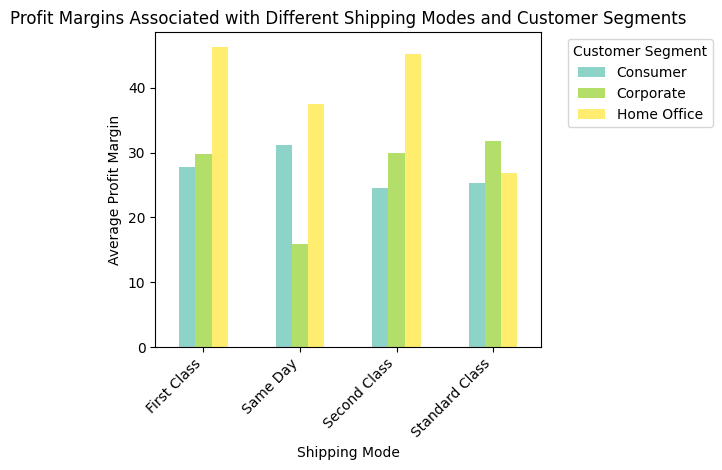

In [23]:
# Group by shipping mode and customer segment, calculate the mean profit margin
profit_margin_by_mode_segment = df.groupby(['Ship Mode', 'Segment'])['Profit'].mean().unstack()

# Plot a grouped bar chart
plt.figure(figsize=(12, 8))
profit_margin_by_mode_segment.plot(kind='bar', colormap='Set3')
plt.title('Profit Margins Associated with Different Shipping Modes and Customer Segments')
plt.xlabel('Shipping Mode')
plt.ylabel('Average Profit Margin')
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the chart
plt.show()

C:\Users\ADITI SINGH\AppData\Local\Temp\ipykernel_7856\2820969574.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='ProcessingTime', data=df, palette='viridis')


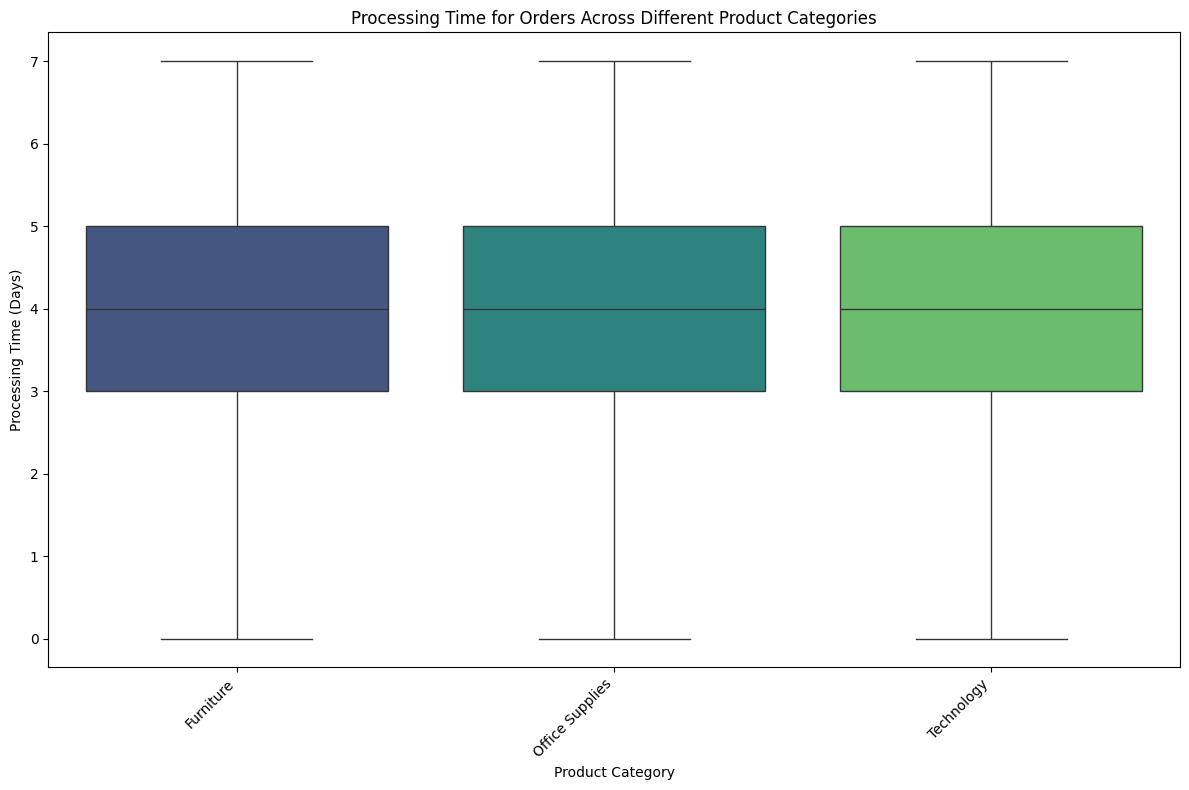

In [24]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Calculate processing time (in days) for each order
df['ProcessingTime'] = (df['Ship Date'] - df['Order Date']).dt.days

# Create a boxplot or violin plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='ProcessingTime', data=df, palette='viridis')
plt.title('Processing Time for Orders Across Different Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Processing Time (Days)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the chart
plt.show()

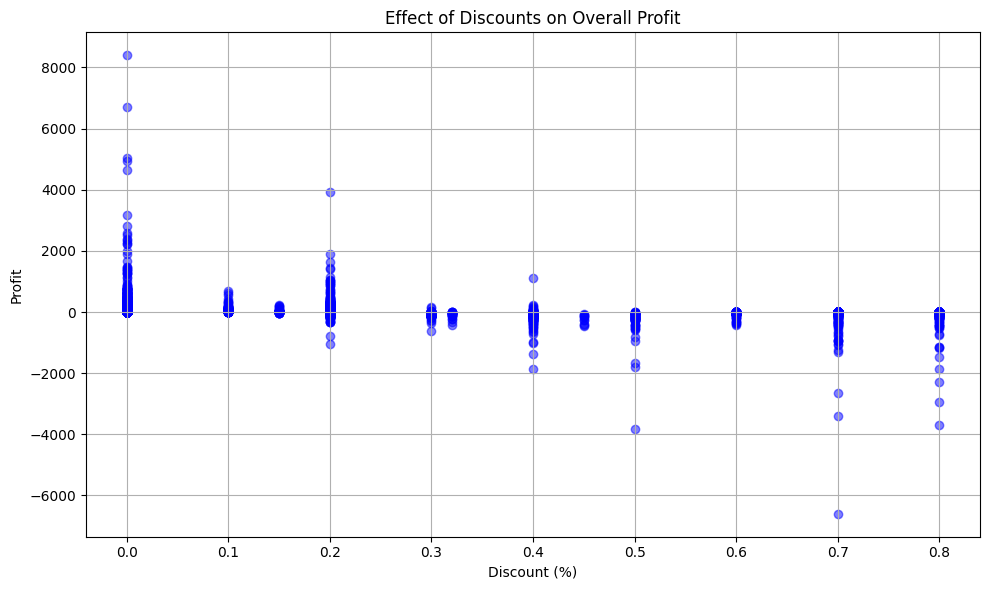

In [26]:


# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Discount'], df['Profit'], alpha=0.5, color='blue')
plt.title('Effect of Discounts on Overall Profit')
plt.xlabel('Discount (%)')
plt.ylabel('Profit')
plt.grid(True)
plt.tight_layout()

# Show the chart
plt.show()

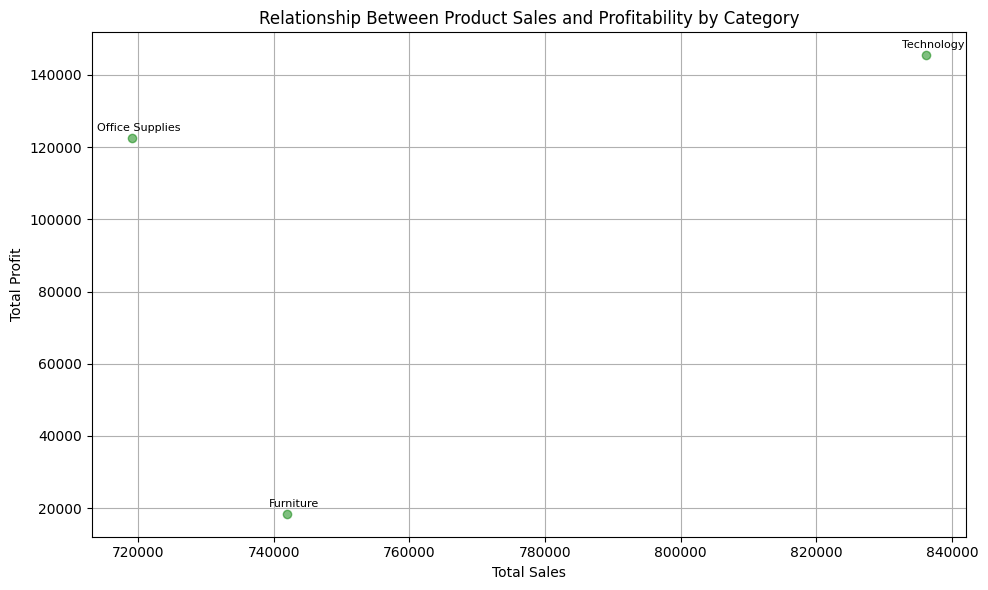

In [27]:
# Group by product category and calculate total sales and profit
category_sales_profit = df.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'})

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(category_sales_profit['Sales'], category_sales_profit['Profit'], alpha=0.5, color='green')
plt.title('Relationship Between Product Sales and Profitability by Category')
plt.xlabel('Total Sales')
plt.ylabel('Total Profit')
plt.grid(True)
plt.tight_layout()

# Annotate each point with the category name
for category, sales, profit in zip(category_sales_profit.index, category_sales_profit['Sales'], category_sales_profit['Profit']):
    plt.annotate(category, (sales, profit), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

# Show the chart
plt.show()

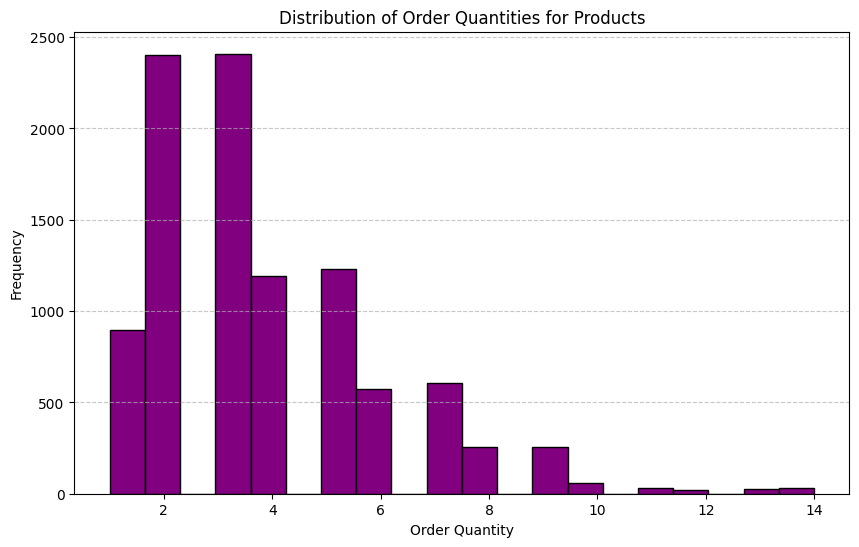

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(df['Quantity'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Order Quantities for Products')
plt.xlabel('Order Quantity')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.show()

C:\Users\ADITI SINGH\AppData\Local\Temp\ipykernel_7856\2726449756.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Profit', data=df, palette='viridis')
C:\Users\ADITI SINGH\AppData\Local\Temp\ipykernel_7856\2726449756.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Category', y='Profit', data=df, palette='viridis')


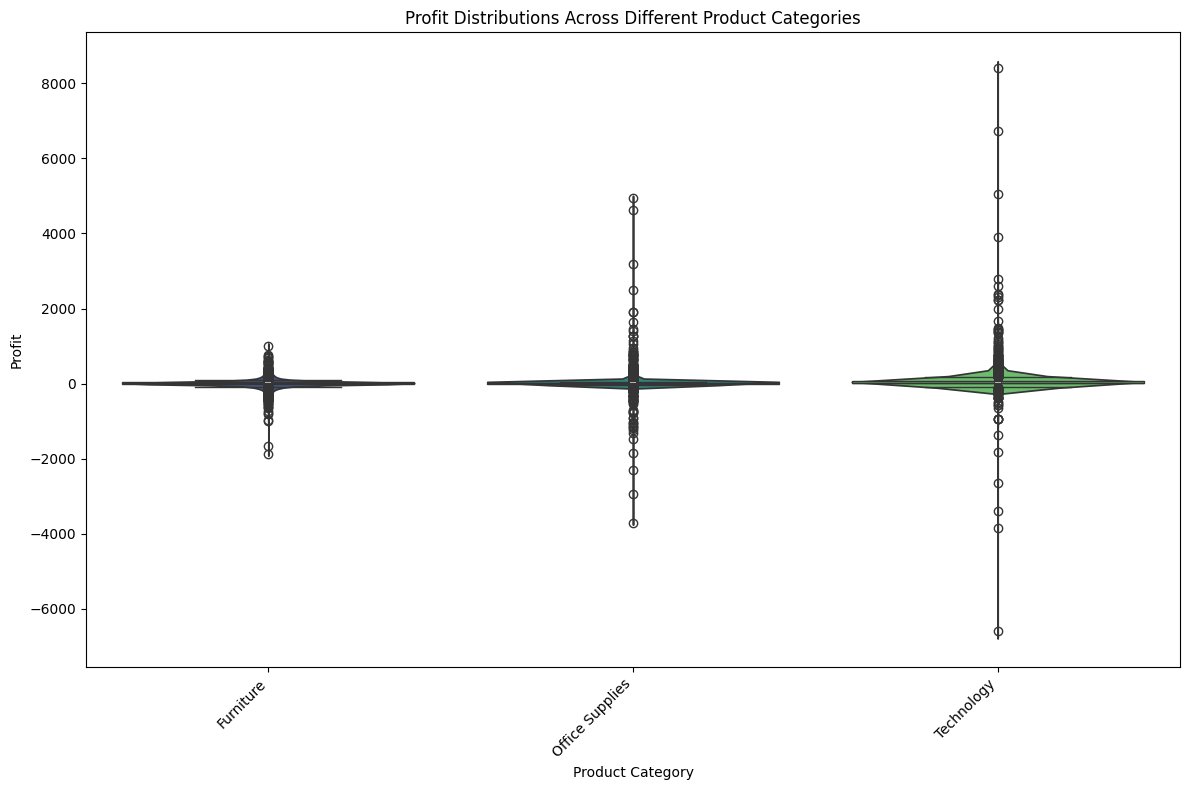

In [32]:
# Create a box plot or violin plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Profit', data=df, palette='viridis')
sns.violinplot(x='Category', y='Profit', data=df, palette='viridis')
plt.title('Profit Distributions Across Different Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the chart
plt.show()

C:\Users\ADITI SINGH\AppData\Local\Temp\ipykernel_7856\1779975750.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ship Mode', y='Shipping Time', data=df, palette='Set2')


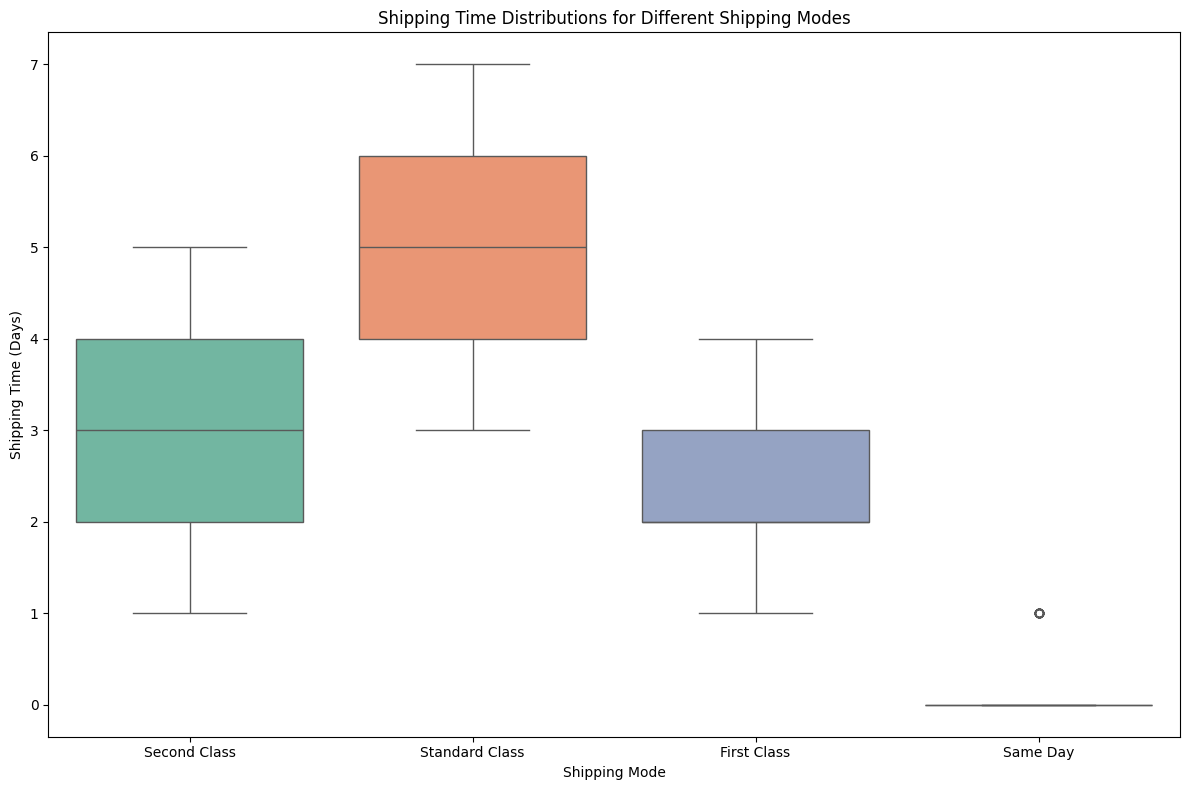

In [35]:
# Convert 'OrderDate' and 'ShipDate' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Calculate shipping time in days
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Create a box plot or violin plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Ship Mode', y='Shipping Time', data=df, palette='Set2')
# Uncomment the line below for a violin plot instead of a box plot
# sns.violinplot(x='ShipMode', y='ShippingTime', data=df, palette='Set2')
plt.title('Shipping Time Distributions for Different Shipping Modes')
plt.xlabel('Shipping Mode')
plt.ylabel('Shipping Time (Days)')
plt.tight_layout()

# Show the chart
plt.show()

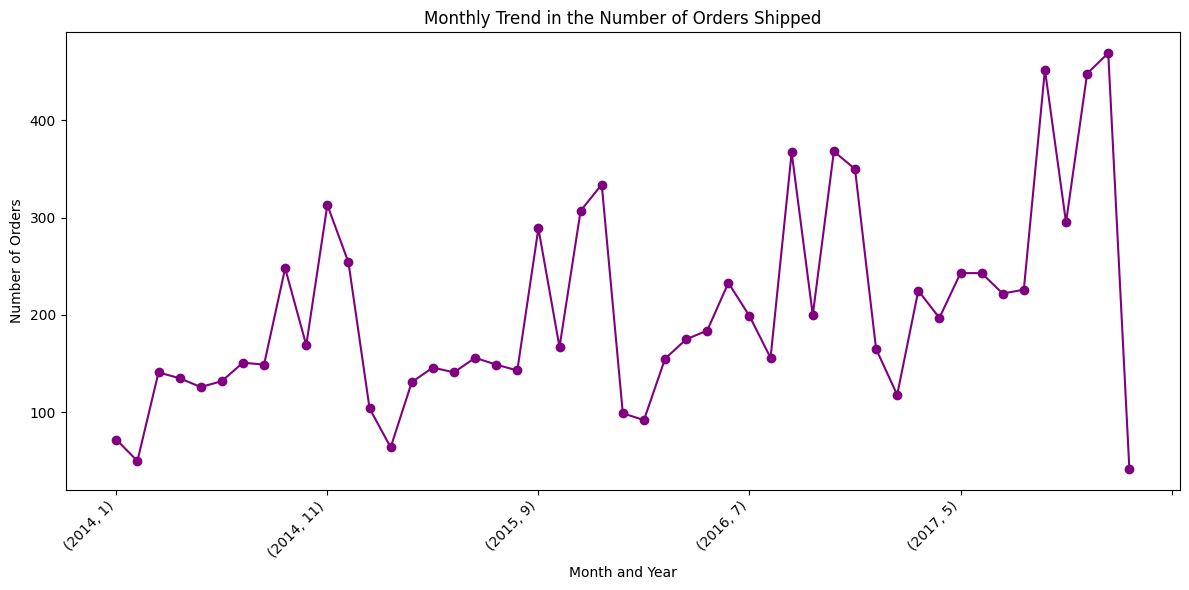

In [36]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Extract month and year from 'ShipDate'
df['Month'] = df['Ship Date'].dt.month
df['Year'] = df['Ship Date'].dt.year

# Group by month and year, count the number of orders
monthly_orders = df.groupby(['Year', 'Month']).size()

# Create a line plot or bar plot
plt.figure(figsize=(12, 6))
monthly_orders.plot(kind='line', marker='o', color='purple')
# Uncomment the line below for a bar plot instead of a line plot
# monthly_orders.plot(kind='bar', color='purple')
plt.title('Monthly Trend in the Number of Orders Shipped')
plt.xlabel('Month and Year')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the chart
plt.show()

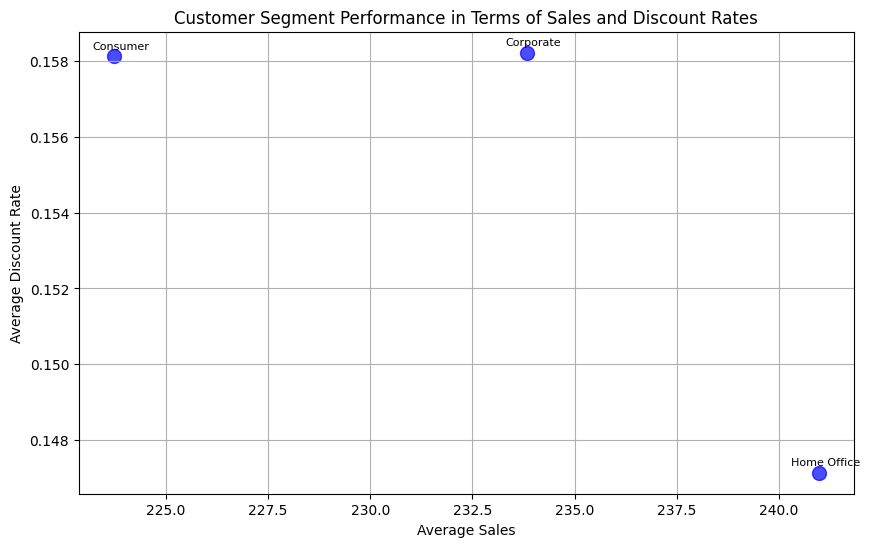

In [37]:
# Group by customer segment and calculate mean sales and discount rate
segment_performance = df.groupby('Segment').agg({'Sales': 'mean', 'Discount': 'mean'}).reset_index()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(segment_performance['Sales'], segment_performance['Discount'], c='blue', alpha=0.7, s=100)
plt.title('Customer Segment Performance in Terms of Sales and Discount Rates')
plt.xlabel('Average Sales')
plt.ylabel('Average Discount Rate')
plt.grid(True)

# Annotate each point with the segment name
for segment, sales, discount in zip(segment_performance['Segment'], segment_performance['Sales'], segment_performance['Discount']):
    plt.annotate(segment, (sales, discount), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8)

# Show the chart
plt.show()

<Figure size 1400x800 with 0 Axes>

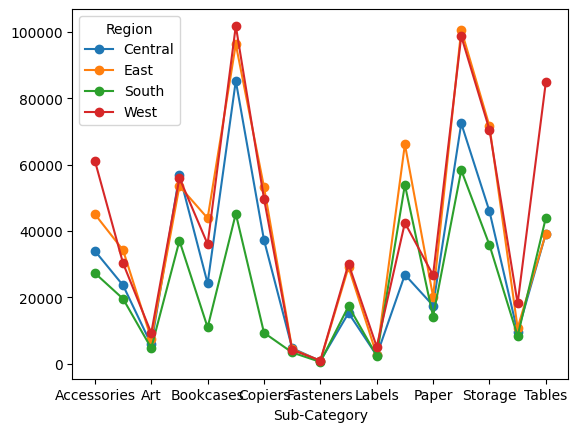

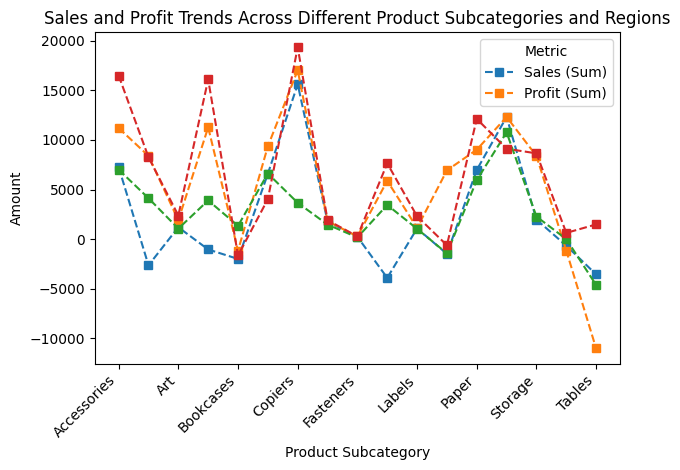

In [38]:
# Group by subcategory, region, and extract sales and profit
subcategory_region_performance = df.groupby(['Sub-Category', 'Region']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Pivot the data for better plotting
pivot_data = subcategory_region_performance.pivot(index='Sub-Category', columns='Region', values=['Sales', 'Profit'])

# Create a multi-line plot
plt.figure(figsize=(14, 8))
pivot_data['Sales'].plot(kind='line', marker='o')
pivot_data['Profit'].plot(kind='line', marker='s', linestyle='--')
plt.title('Sales and Profit Trends Across Different Product Subcategories and Regions')
plt.xlabel('Product Subcategory')
plt.ylabel('Amount')
plt.legend(title='Metric', labels=['Sales (Sum)', 'Profit (Sum)'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the chart
plt.show()

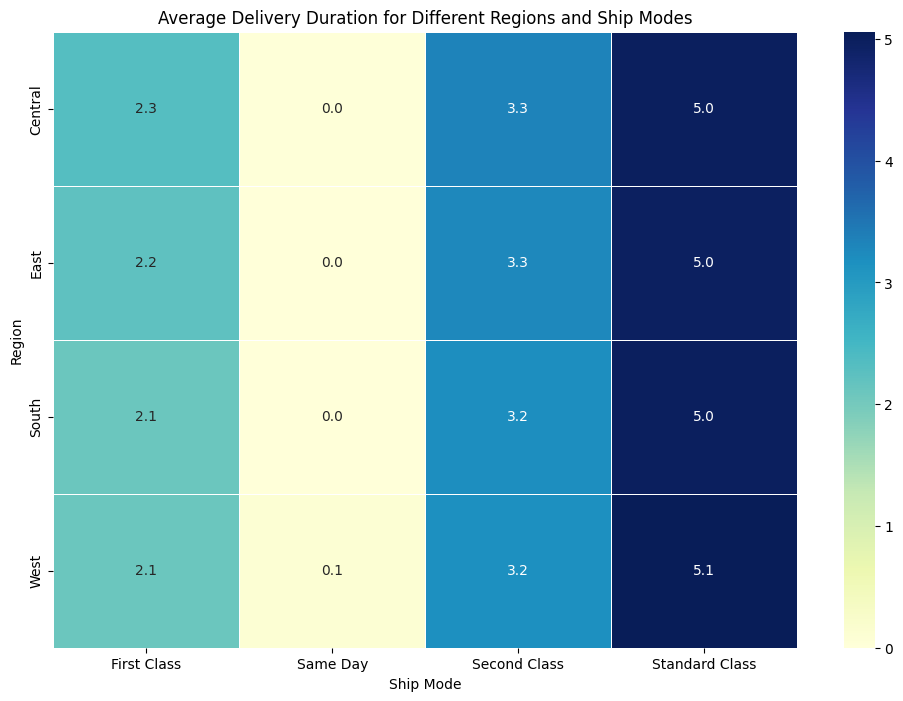

In [41]:
# Convert 'OrderDate' and 'ShipDate' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Calculate delivery duration in days
df['DeliveryDuration'] = (df['Ship Date'] - df['Order Date']).dt.days

# Group by region and ship mode, calculate mean delivery duration
region_shipmode_duration = df.groupby(['Region', 'Ship Mode']).agg({'DeliveryDuration': 'mean'}).reset_index()

# Create a heatmap or grouped bar plot
plt.figure(figsize=(12, 8))
heatmap_data = region_shipmode_duration.pivot(index='Region', columns='Ship Mode', values='DeliveryDuration')
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".1f", linewidths=.5)
# Uncomment the line below for a grouped bar plot instead of a heatmap
# sns.barplot(x='Region', y='DeliveryDuration', hue='ShipMode', data=region_shipmode_duration, palette='viridis')
plt.title('Average Delivery Duration for Different Regions and Ship Modes')
plt.xlabel('Ship Mode')
plt.ylabel('Region')

# Show the chart
plt.show()

<Figure size 1400x800 with 0 Axes>

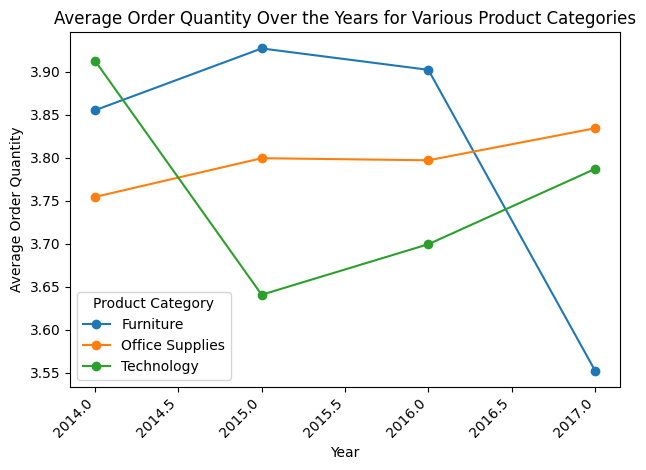

In [42]:
# Convert 'OrderDate' to datetime format
df['OrderDate'] = pd.to_datetime(df['Order Date'])

# Extract year and month from 'OrderDate'
df['Year'] = df['OrderDate'].dt.year

# Group by year and product category, calculate mean order quantity
year_category_quantity = df.groupby(['Year', 'Category']).agg({'Quantity': 'mean'}).reset_index()

# Pivot the data for better plotting
pivot_data = year_category_quantity.pivot(index='Year', columns='Category', values='Quantity')

# Create a line plot or grouped bar plot
plt.figure(figsize=(14, 8))
pivot_data.plot(kind='line', marker='o')
# Uncomment the line below for a grouped bar plot instead of a line plot
# pivot_data.plot(kind='bar', colormap='viridis')
plt.title('Average Order Quantity Over the Years for Various Product Categories')
plt.xlabel('Year')
plt.ylabel('Average Order Quantity')
plt.legend(title='Product Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the chart
plt.show()

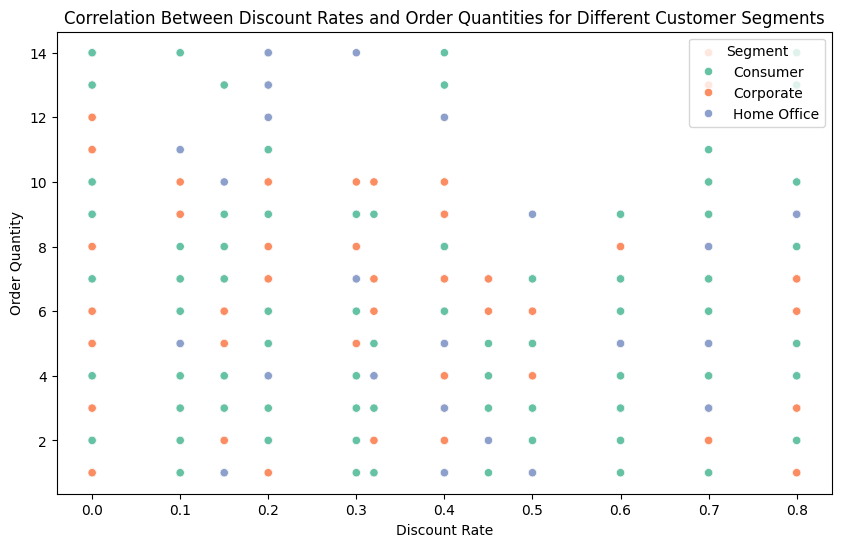

In [43]:
# Create a scatter plot or joint plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Quantity', hue='Segment', data=df, palette='Set2')
# Uncomment the line below for a joint plot instead of a scatter plot
# sns.jointplot(x='Discount', y='Quantity', hue='Segment', data=df, kind='scatter', palette='Set2')

plt.title('Correlation Between Discount Rates and Order Quantities for Different Customer Segments')
plt.xlabel('Discount Rate')
plt.ylabel('Order Quantity')

# Show the chart
plt.show()

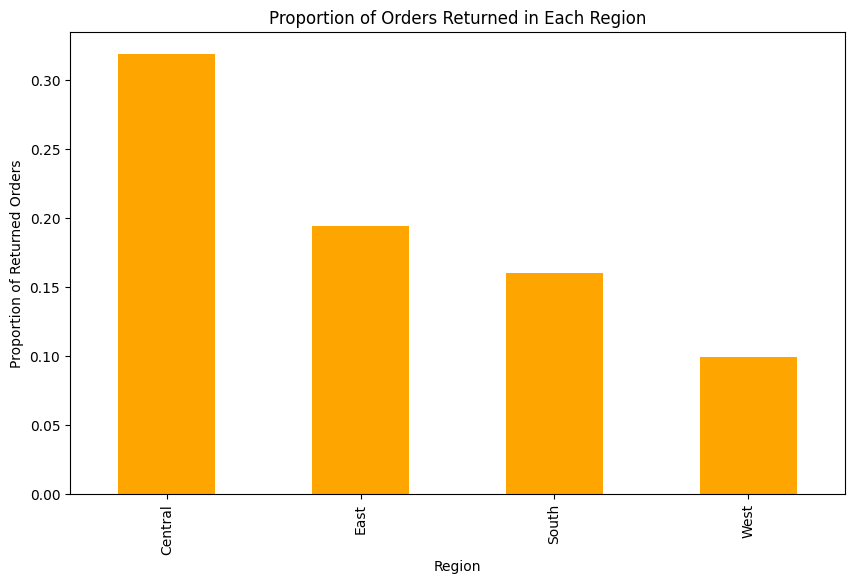

In [45]:
# Calculate the proportion of returned orders in each region
returned_orders = df[df['Profit'] < 0].groupby('Region').size()
total_orders = df.groupby('Region').size()
return_proportion = returned_orders / total_orders

# Create a bar plot or pie chart
plt.figure(figsize=(10, 6))
return_proportion.plot(kind='bar', color='orange')
# Uncomment the line below for a pie chart instead of a bar plot
# plt.pie(return_proportion, labels=return_proportion.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Proportion of Orders Returned in Each Region')
plt.xlabel('Region')
plt.ylabel('Proportion of Returned Orders')

# Show the chart
plt.show()

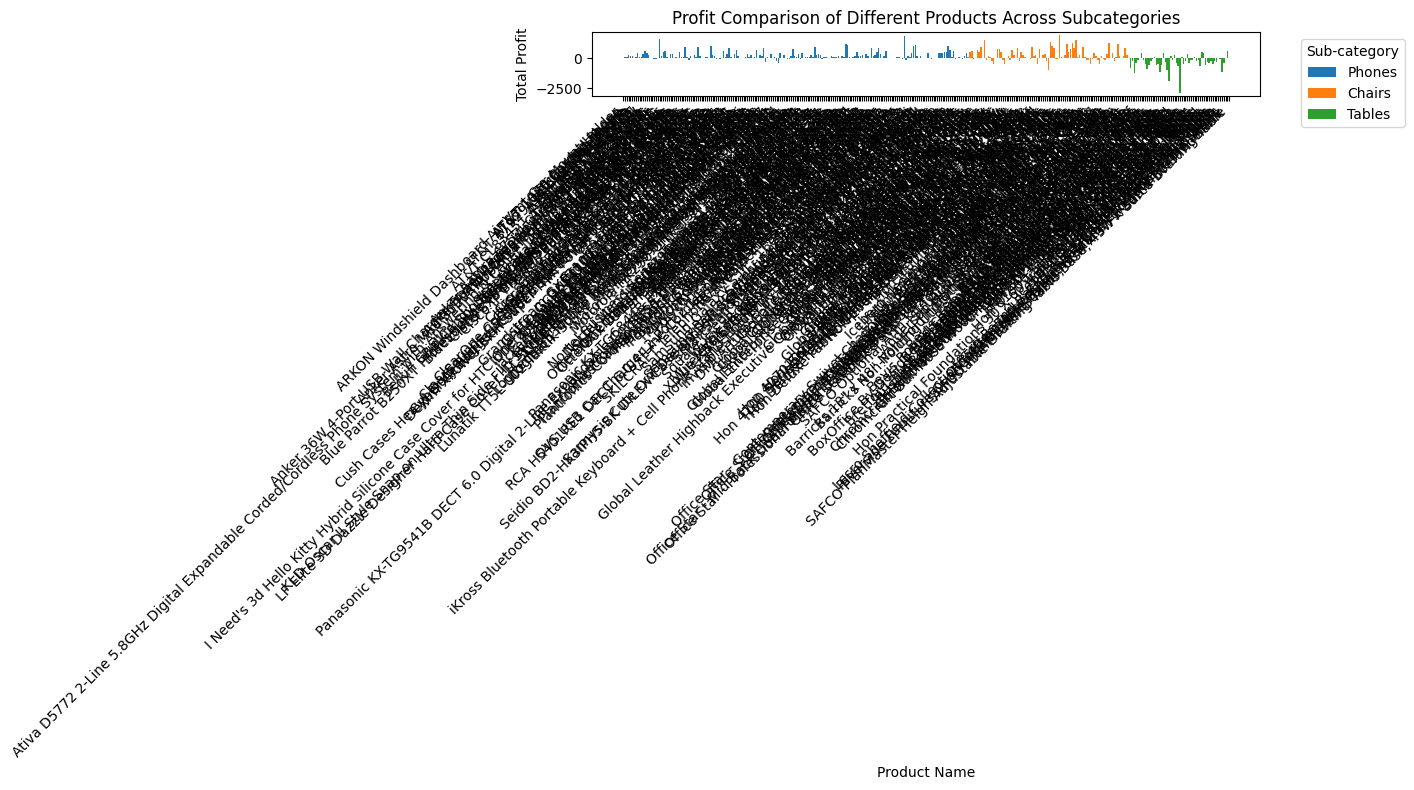

In [46]:
# Group by subcategory and product name, calculate total profit
subcategory_product_profit = df.groupby(['Sub-Category', 'Product Name'])['Profit'].sum().reset_index()

# Select a subset of subcategories for better visualization (you can modify this based on your data)
selected_subcategories = ['Phones', 'Chairs', 'Tables']

# Filter the data for selected subcategories
filtered_data = subcategory_product_profit[subcategory_product_profit['Sub-Category'].isin(selected_subcategories)]

# Create a grouped bar plot
plt.figure(figsize=(14, 8))
for subcategory in selected_subcategories:
    subcategory_data = filtered_data[filtered_data['Sub-Category'] == subcategory]
    plt.bar(subcategory_data['Product Name'], subcategory_data['Profit'], label=subcategory)

plt.title('Profit Comparison of Different Products Across Subcategories')
plt.xlabel('Product Name')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sub-category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the chart
plt.show()

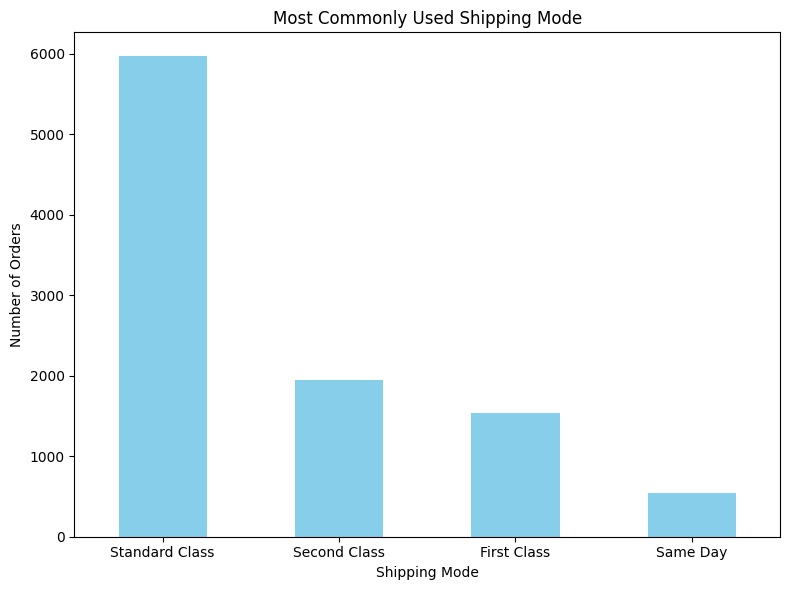

In [47]:
# Count the occurrences of each shipping mode
shipping_mode_counts = df['Ship Mode'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
shipping_mode_counts.plot(kind='bar', color='skyblue')
plt.title('Most Commonly Used Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the chart
plt.show()

<Figure size 1200x800 with 0 Axes>

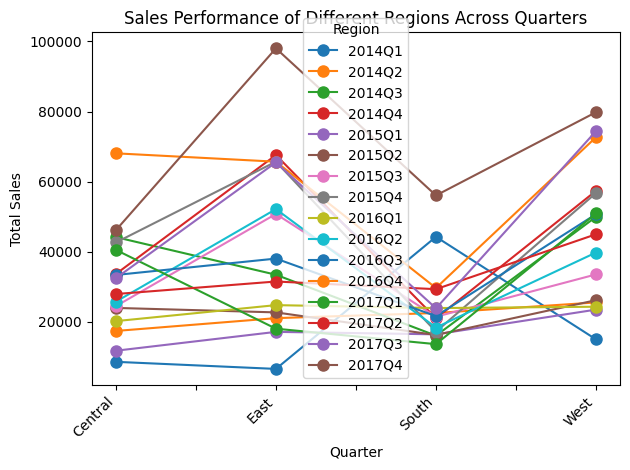

In [48]:
# Convert 'OrderDate' to datetime format
df['OrderDate'] = pd.to_datetime(df['Order Date'])

# Extract quarter from 'OrderDate'
df['Quarter'] = df['OrderDate'].dt.to_period("Q")

# Group by region and quarter, calculate total sales
region_quarter_sales = df.groupby(['Region', 'Quarter'])['Sales'].sum().unstack()

# Create a line plot
plt.figure(figsize=(12, 8))
region_quarter_sales.plot(marker='o', linestyle='-', markersize=8)
plt.title('Sales Performance of Different Regions Across Quarters')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.legend(title='Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the chart
plt.show()

<Figure size 1200x800 with 0 Axes>

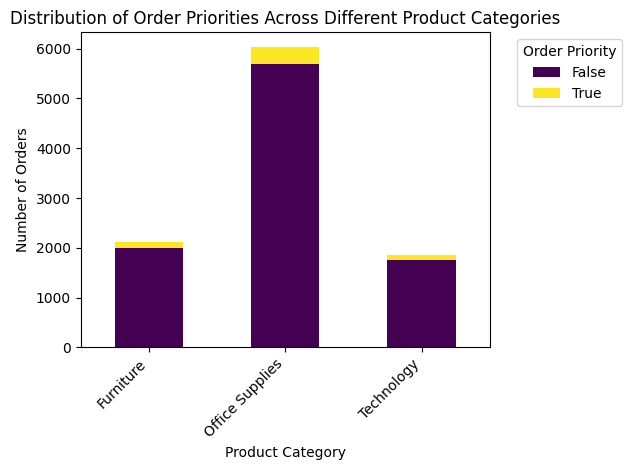

In [50]:
# Group by product category and order priority, calculate the count
category_priority_counts = df.groupby(['Category', df['Ship Mode'] == 'Same Day']).size().unstack()

# Create a stacked bar plot
plt.figure(figsize=(12, 8))
category_priority_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution of Order Priorities Across Different Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.legend(title='Order Priority', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the chart
plt.show()

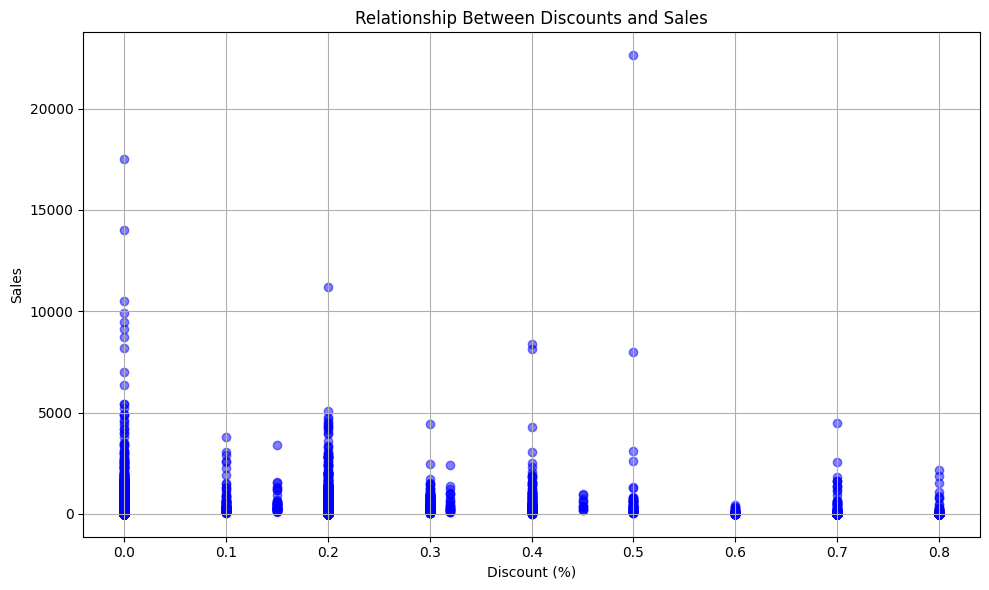

In [51]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Discount'], df['Sales'], alpha=0.5, color='blue')
plt.title('Relationship Between Discounts and Sales')
plt.xlabel('Discount (%)')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()

# Show the chart
plt.show()

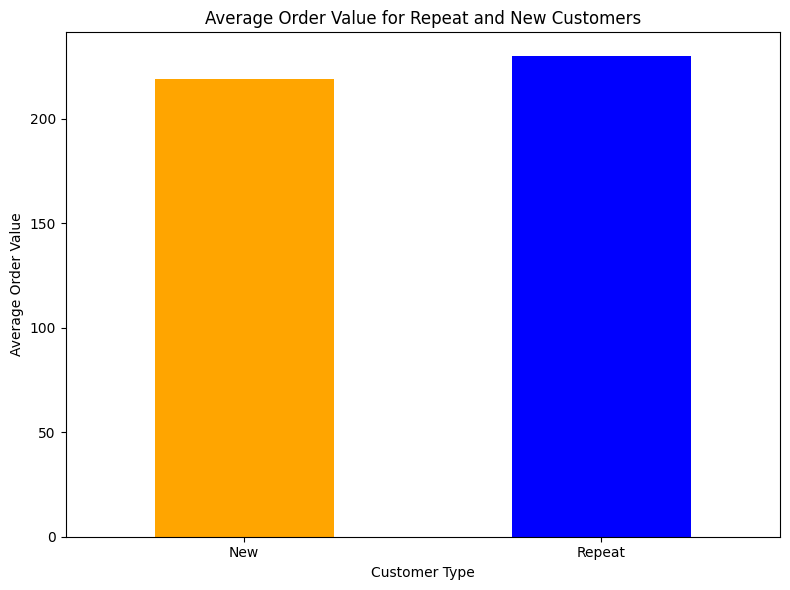

In [52]:
# Identify repeat customers based on customer IDs
repeat_customers = df[df.duplicated(subset='Customer ID', keep=False)]

# Create a new column to categorize customers as 'Repeat' or 'New'
df['CustomerType'] = 'New'
df.loc[df['Customer ID'].isin(repeat_customers['Customer ID']), 'CustomerType'] = 'Repeat'

# Group by customer type and calculate the mean order value
customer_type_order_value = df.groupby('CustomerType')['Sales'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
customer_type_order_value.plot(kind='bar', color=['orange', 'blue'])
plt.title('Average Order Value for Repeat and New Customers')
plt.xlabel('Customer Type')
plt.ylabel('Average Order Value')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the chart
plt.show()

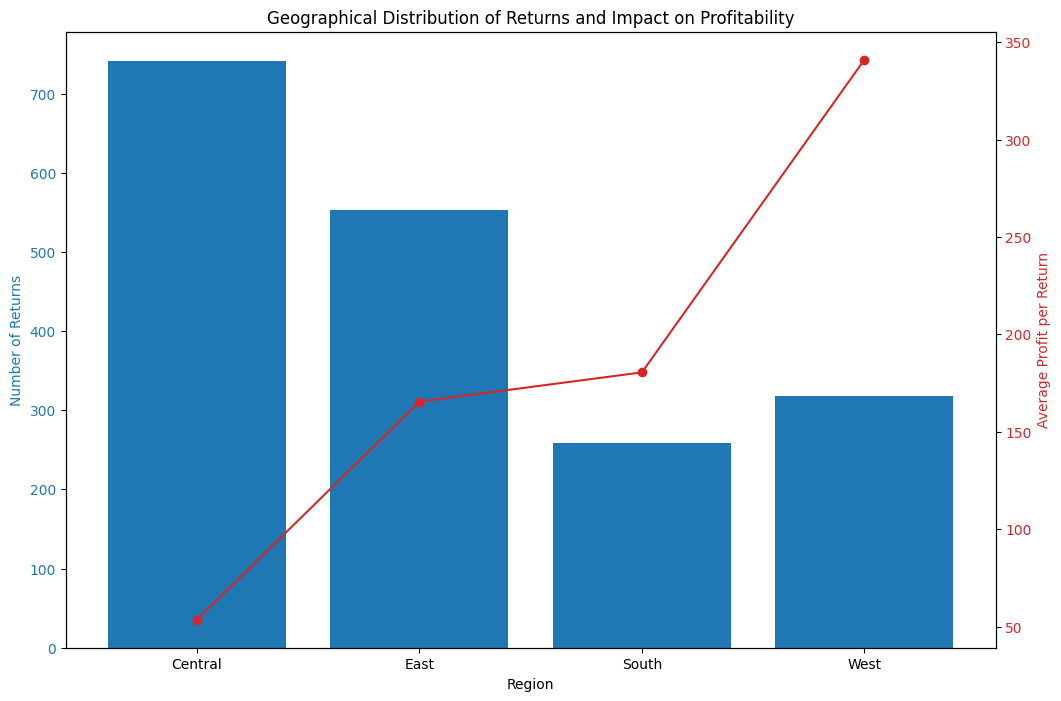

In [55]:
# Group by region and calculate the number of returns and overall profit
df['Returned'] = df['Profit']<0
returns_and_profit = df.groupby('Region').agg({'Returned': 'sum', 'Profit': 'sum'})

# Calculate the average profit per return
returns_and_profit['AverageProfitPerReturn'] = returns_and_profit['Profit'] / returns_and_profit['Returned']

# Create a bar plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for the number of returns
color = 'tab:blue'
ax1.set_xlabel('Region')
ax1.set_ylabel('Number of Returns', color=color)
ax1.bar(returns_and_profit.index, returns_and_profit['Returned'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the average profit per return
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Profit per Return', color=color)
ax2.plot(returns_and_profit.index, returns_and_profit['AverageProfitPerReturn'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Title and show the plot
plt.title('Geographical Distribution of Returns and Impact on Profitability')
plt.show()